In [9]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [10]:
print(tf)

<module 'tensorflow' from 'C:\\Users\\saran\\anaconda3\\envs\\mlenv\\lib\\site-packages\\tensorflow\\__init__.py'>


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

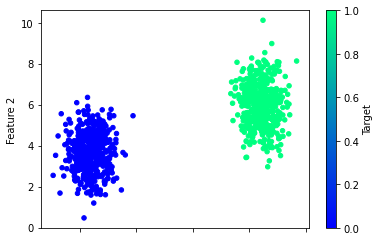

In [11]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [12]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [15]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [16]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [17]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.7804 - accuracy: 0.0707 
Epoch 2/100
24/24 [==============================] - 0s 806us/step - loss: 0.7674 - accuracy: 0.0133
Epoch 3/100
24/24 [==============================] - 0s 711us/step - loss: 0.7565 - accuracy: 0.0253
Epoch 4/100
24/24 [==============================] - 0s 681us/step - loss: 0.7470 - accuracy: 0.0453
Epoch 5/100
24/24 [==============================] - 0s 782us/step - loss: 0.7389 - accuracy: 0.0747
Epoch 6/100
24/24 [==============================] - 0s 823us/step - loss: 0.7321 - accuracy: 0.1053
Epoch 7/100
24/24 [==============================] - 0s 607us/step - loss: 0.7264 - accuracy: 0.1413
Epoch 8/100
24/24 [==============================] - 0s 693us/step - loss: 0.7215 - accuracy: 0.1773
Epoch 9/100
24/24 [==============================] - 0s 737us/step - loss: 0.7175 - accuracy: 0.2040
Epoch 10/100
24/24 [==============================] - 0s 666us/step - loss: 0.7141 - accurac

24/24 [==============================] - 0s 816us/step - loss: 0.2909 - accuracy: 0.9653
Epoch 82/100
24/24 [==============================] - 0s 998us/step - loss: 0.2834 - accuracy: 0.9667
Epoch 83/100
24/24 [==============================] - 0s 915us/step - loss: 0.2762 - accuracy: 0.9680
Epoch 84/100
24/24 [==============================] - 0s 861us/step - loss: 0.2691 - accuracy: 0.9680
Epoch 85/100
24/24 [==============================] - 0s 823us/step - loss: 0.2624 - accuracy: 0.9693
Epoch 86/100
24/24 [==============================] - 0s 907us/step - loss: 0.2559 - accuracy: 0.9747
Epoch 87/100
24/24 [==============================] - 0s 997us/step - loss: 0.2496 - accuracy: 0.9760
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.9800
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9800
Epoch 90/100
24/24 [==============================] - 0s 865us/step - loss: 0.2320 - accuracy: 0.98

<AxesSubplot:>

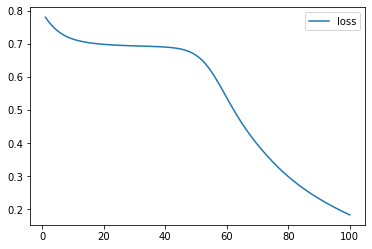

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

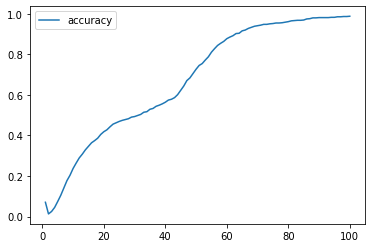

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1693 - accuracy: 0.9920
Loss: 0.16930153965950012, Accuracy: 0.9919999837875366


In [26]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

Non-Linear (Non binary classifier)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

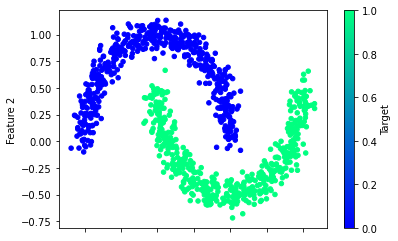

In [27]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [28]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [29]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3510 - accuracy: 0.3080
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1876 - accuracy: 0.3107
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0768 - accuracy: 0.3360
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0015 - accuracy: 0.3533
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9487 - accuracy: 0.3720
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9073 - accuracy: 0.3907
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8745 - accuracy: 0.4080
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8475 - accuracy: 0.4187
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8243 - accuracy: 0.4373
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8055 - accuracy: 0.4493
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7627
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.7627
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7627
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7667
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.7693
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7720
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7733
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7760
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7773
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7787


<AxesSubplot:>

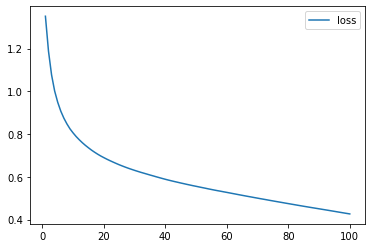

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

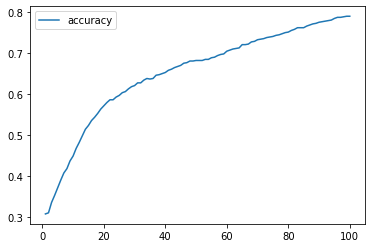

In [31]:
# Plot the accuracy
history_df.plot(y="accuracy")

## More Neurons for Non-linear dataset. To change the NN model structure, we need a new Sequential Model.

In [32]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [33]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [34]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 992us/step - loss: 0.5675 - accuracy: 0.7800
Epoch 2/100
24/24 [==============================] - 0s 880us/step - loss: 0.5426 - accuracy: 0.8107
Epoch 3/100
24/24 [==============================] - 0s 888us/step - loss: 0.5186 - accuracy: 0.8200
Epoch 4/100
24/24 [==============================] - 0s 857us/step - loss: 0.4961 - accuracy: 0.8240
Epoch 5/100
24/24 [==============================] - 0s 802us/step - loss: 0.4739 - accuracy: 0.8320
Epoch 6/100
24/24 [==============================] - 0s 898us/step - loss: 0.4536 - accuracy: 0.8360
Epoch 7/100
24/24 [==============================] - 0s 814us/step - loss: 0.4345 - accuracy: 0.8387
Epoch 8/100
24/24 [==============================] - 0s 853us/step - loss: 0.4166 - accuracy: 0.8427
Epoch 9/100
24/24 [==============================] - 0s 895us/step - loss: 0.4003 - accuracy: 0.8427
Epoch 10/100
24/24 [==============================] - 0s 811us/step - loss: 0.3850 - accura

24/24 [==============================] - 0s 857us/step - loss: 0.1925 - accuracy: 0.9173
Epoch 82/100
24/24 [==============================] - 0s 831us/step - loss: 0.1910 - accuracy: 0.9173
Epoch 83/100
24/24 [==============================] - 0s 839us/step - loss: 0.1896 - accuracy: 0.9173
Epoch 84/100
24/24 [==============================] - 0s 766us/step - loss: 0.1881 - accuracy: 0.9173
Epoch 85/100
24/24 [==============================] - 0s 780us/step - loss: 0.1866 - accuracy: 0.9173
Epoch 86/100
24/24 [==============================] - 0s 737us/step - loss: 0.1853 - accuracy: 0.9187
Epoch 87/100
24/24 [==============================] - 0s 818us/step - loss: 0.1837 - accuracy: 0.9213
Epoch 88/100
24/24 [==============================] - 0s 790us/step - loss: 0.1821 - accuracy: 0.9227
Epoch 89/100
24/24 [==============================] - 0s 771us/step - loss: 0.1806 - accuracy: 0.9240
Epoch 90/100
24/24 [==============================] - 0s 737us/step - loss: 0.1790 - accuracy: 